# Linear Algebra 4 - Loss minimization in classification

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from sklearn.datasets import make_blobs

In [58]:
X, Y = make_blobs(centers = 2, random_state = 48)

In [59]:
X.shape

(100, 2)

In [60]:
Y.shape

(100,)

In [61]:
X[:5]

array([[ -9.56563764,   8.32533613],
       [-10.60544931,   9.34892553],
       [ -9.26964904,   7.36521415],
       [ -4.48064804,  -6.64764378],
       [ -8.86375682,   7.67001453]])

In [62]:
Y[:5]

array([0, 0, 0, 1, 0])

In [63]:
# It'll just change the color coding a little bit
Y[Y == 1] = -1
Y[Y == 0] = 1

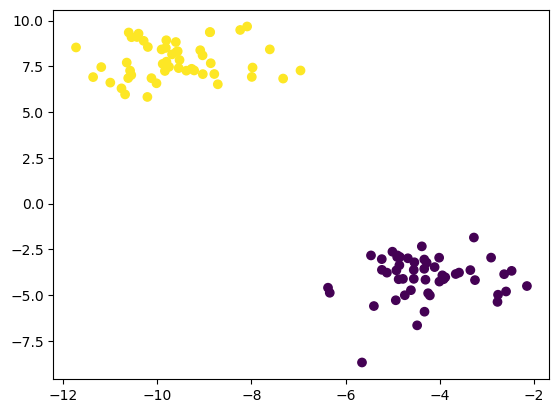

In [64]:
plt.scatter(X[:, 0],X[:,1], c = Y)

### Finding Distance of a point from the line:

In [ ]:
# Say we have,
# 2x1 - x2 + 3 = 0
# xq = (4,6)
# w = [2, -1]
# w0 = 3

In [35]:
def distance(w, w0, xq):
    return (np.dot(w, xq) + w0) / np.linalg.norm(w)

In [36]:
w = np.array([2, -1])
w0 = 3

xq = np.array([4,6])

distance(w, w0, xq)

2.23606797749979

In [37]:
# It is coming out to be root 5 by calculating it manually which is:
5 ** 0.5

2.23606797749979

In [38]:
# Let's take a point in the opposite direction of w.
xq = [-5, 8]

distance(w, w0, xq)

-6.7082039324993685

Hence, the distance is negative in this case.

In [43]:
def plot_line(w, w0):
    x1 = np.array([-12,-2, 0, 1])
    x2 = -(w0 + x1 * w[0]) / w[1]
    
    plt.plot(x1, x2)

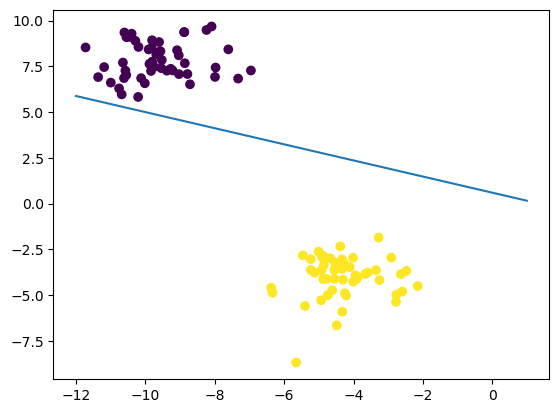

In [44]:
w = np.array([-2.2, -5])
w0 = 3
plot_line(w, w0)

plt.scatter(X[:, 0], X[:, 1], c = Y)

We randomly initialized a line here.

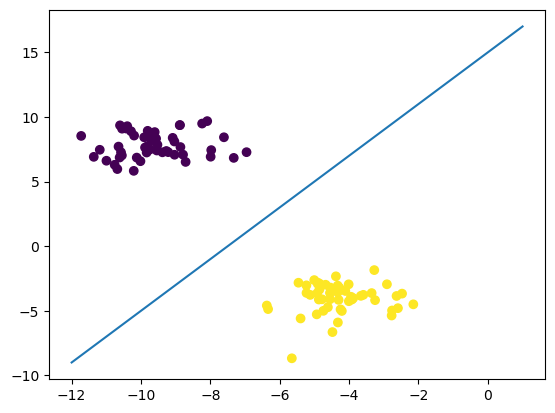

In [46]:
w = np.array([2, -1])
w0 = 15
plot_line(w, w0)

plt.scatter(X[:, 0], X[:, 1], c = Y)

Which line is better out of the two? Let's find the average distance of all the data points for each line.

### Finding Average distance for each line:

In [66]:
def average_distance(w , w0, X, Y):
    total_dis = 0
    for i in range(len(X)):
        total_dis += Y[i] * distance(w, w0, X[i])
    
    return (total_dis / len(X)).round(2)

-5.03


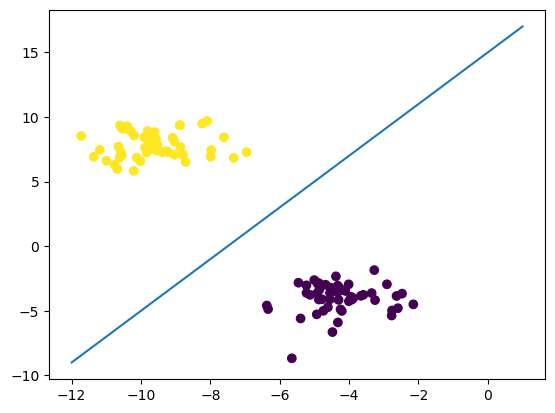

In [67]:
w = np.array([2, -1])
w0 = 15

print(average_distance(w, w0, X, Y))

plot_line(w, w0)

plt.scatter(X[:, 0], X[:, 1], c = Y)

The average distance is negative (-5.03) due to w being towards the purple points and we had given the purple points the label of -1.<br>

The distance below (for purple points) will come as positive since it's in the direction of w vector. But, since the label is given as -1, the final distance would become -ve.<br>

Similarly, for the yellow data points, the distance would be -ve since they're in the opposite direction of w vector, but we have given the label of +ve to it, the final distance would become -ve here as well.<br>

Hence, total average distance is -ve.

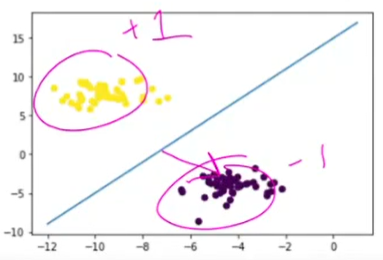

5.03


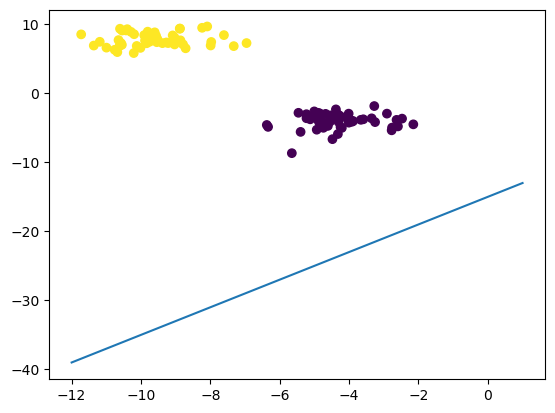

In [68]:
w = np.array([-2, 1])
w0 = 15

print(average_distance(w, w0, X, Y))

plot_line(w, w0)

plt.scatter(X[:, 0], X[:, 1], c = Y)

Why did the line shifted so much downwards? That's because y-intercept = -15/1 = -15 whereas previously y-intercept = -15/-1 = 15

5.03


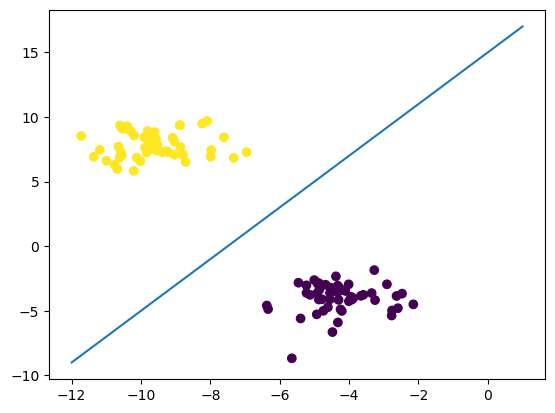

In [72]:
# Now, let's change w0 to make it better.
w = np.array([-2, 1])
w0 = -15

print(average_distance(w, w0, X, Y))

plot_line(w, w0)

plt.scatter(X[:, 0], X[:, 1], c = Y)

4.1


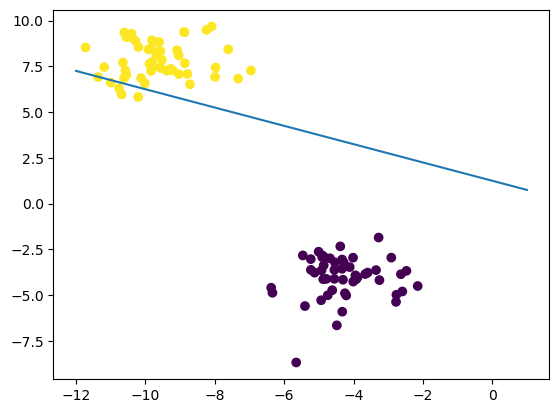

In [73]:
# Now, let's change w0 to make it better.
w = np.array([2, 4])
w0 = -5

print(average_distance(w, w0, X, Y))

plot_line(w, w0)

plt.scatter(X[:, 0], X[:, 1], c = Y)

 Now, we can try different lines and see which line gives us the maximum distance. That would be the best line.

<strong>Conclusion:</strong> We are manually changing lines here and finding the maximum distance. This changing of w and w0 can be done by Gradient Descent which will be covered in the coming classes.

<strong>If you have any questions, connect with me here:</strong> https://www.linkedin.com/in/khushalkumar/